**Marchel Christhoper Wuisang – 2501991611**

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [92]:
df = pd.read_csv('/content/laptop_data.csv')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [94]:
df.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

Since the laptop dataset contain categorical features, then feature engineering is necessary.

Feature Engineering

# Convert categorical

In [95]:
df=pd.get_dummies(df, columns=["Company", "TypeName", "Cpu_brand", "Gpu_brand", "Os"], drop_first=True)

Since  “Company”, “TypeName”, “Cpu_brand”, “Gpu_brand”, “Os” d doesnt have rank then we can't perform ordinal encode with 0,1,2, to n. So use the onehot

# Data for model

In [96]:
df_model = df.copy()

In [97]:
df_model

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD,Company_Apple,Company_Asus,...,TypeName_Ultrabook,TypeName_Workstation,Cpu_brand_Intel Core i3,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor,Gpu_brand_Intel,Gpu_brand_Nvidia,Os_Others,Os_Windows
0,8,1.37,11.175755,0,1,226.983005,0,128,1,0,...,1,0,0,1,0,0,1,0,0,0
1,8,1.34,10.776777,0,0,127.677940,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0
2,8,1.86,10.329931,0,0,141.211998,0,256,0,0,...,0,0,0,1,0,0,1,0,1,0
3,16,1.83,11.814476,0,1,220.534624,0,512,1,0,...,1,0,0,0,1,0,0,0,0,0
4,8,1.37,11.473101,0,1,226.983005,0,256,1,0,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,4,2.20,10.555257,0,0,100.454670,500,0,0,1,...,0,0,0,0,1,0,0,1,0,1
1269,4,1.80,10.433899,1,1,157.350512,0,128,0,0,...,0,0,0,0,1,0,1,0,0,1
1270,16,1.30,11.288115,1,1,276.053530,0,512,0,0,...,0,0,0,0,1,0,1,0,0,1
1271,2,1.50,9.409283,0,0,111.935204,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


get rid of non important feature

In [98]:
df_model

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD,Company_Apple,Company_Asus,...,TypeName_Ultrabook,TypeName_Workstation,Cpu_brand_Intel Core i3,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor,Gpu_brand_Intel,Gpu_brand_Nvidia,Os_Others,Os_Windows
0,8,1.37,11.175755,0,1,226.983005,0,128,1,0,...,1,0,0,1,0,0,1,0,0,0
1,8,1.34,10.776777,0,0,127.677940,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0
2,8,1.86,10.329931,0,0,141.211998,0,256,0,0,...,0,0,0,1,0,0,1,0,1,0
3,16,1.83,11.814476,0,1,220.534624,0,512,1,0,...,1,0,0,0,1,0,0,0,0,0
4,8,1.37,11.473101,0,1,226.983005,0,256,1,0,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,4,2.20,10.555257,0,0,100.454670,500,0,0,1,...,0,0,0,0,1,0,0,1,0,1
1269,4,1.80,10.433899,1,1,157.350512,0,128,0,0,...,0,0,0,0,1,0,1,0,0,1
1270,16,1.30,11.288115,1,1,276.053530,0,512,0,0,...,0,0,0,0,1,0,1,0,0,1
1271,2,1.50,9.409283,0,0,111.935204,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


# No2 Regression Task and reduce the dimension

In [99]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

XR = df.drop('Price',axis=1)
yR = df['Price']


pca = PCA(n_components=20)  # adjust number of components (HALF OF NUMBER OF FEATURE make as 20)
X_pca = pca.fit_transform(XR)

X_train, X_test, y_train, y_test = train_test_split(X_pca, yR, test_size=0.2, random_state=42)

In [100]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1018, 20), (1018,), (255, 20), (255,))

In [101]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [102]:
# Regression with Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(f"Decision Tree RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_dt))}")
print(f"Decision Tree R-squared: {r2_score(y_test, y_pred_dt)}")

Decision Tree RMSE: 0.3779136879416263
Decision Tree R-squared: 0.6394591478165383


In [103]:
# Regression with KNN
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(f"KNN RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_knn))}")
print(f"KNN R-squared: {r2_score(y_test, y_pred_knn)}")

KNN RMSE: 0.29865305712831447
KNN R-squared: 0.7748338169524487


In [104]:
# Regression with Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(f"Linear Regression RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr))}")
print(f"Linear Regression R-squared: {r2_score(y_test, y_pred_lr)}")

Linear Regression RMSE: 0.27511641531010295
Linear Regression R-squared: 0.8089257143296104


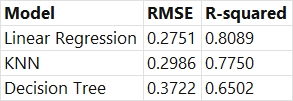